In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris, load_digits, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(42)  # Set a seed for reproducibility

# Linear Regression

In [3]:
# 10 random integers in a column (single feature)
X = np.random.randint(1, 10, size=(10, 1))

# Generate Dependent Variable (y)
# Define a linear relationship with some added noise
# y = 2*X + 1 + random noise
noise = np.random.normal(0, 1, size=(10,))  # Random noise with mean=0, std=1
y = 2 * X.flatten() + 1 + noise  # Linear relationship + noise
# Flattening X here to convert it from 2D array to 1D for arithmetic

# Split Data into Training and Testing Sets
# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Linear Regression Model
# Create the model instance and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on the Test Set
# Use the trained model to predict the y values for the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
# MSE measures the average squared difference between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)

print("Randomly Generated X and y:")
print("X:", X.flatten())
print("y:", y)
print("\nLinear Regression Mean Squared Error:", mse)

Randomly Generated X and y:
X: [7 4 2 7 6 5 9 4 4 6]
y: [14.62774847  8.14495219  4.40620734 16.46314332 13.39180094 10.91988466
 17.97524974  8.78999349  7.31218418 13.02461496]

Linear Regression Mean Squared Error: 1.5593741123321447


#### Data Generation:
- **\( X \):** Randomly generated using `np.random.randint` to create independent variable values.
- **\( y \):** Calculated as a linear function of \( X \) with added random noise using `np.random.normal`.

#### Data Splitting:
- `train_test_split` divides the data into training and testing sets, ensuring a separate dataset for model validation.

#### Model Training:
- The model learns the relationship between \( X_{\text{train}} \) (independent variable in training set) and \( y_{\text{train}} \) (dependent variable in training set).

#### Model Prediction:
- The trained model predicts \( y_{\text{test}} \) based on \( X_{\text{test}} \), which was unseen during training.

#### Evaluation:
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values. It quantifies the error to evaluate model performance, with smaller values indicating better accuracy.

In [ ]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("k-Means Clustering")
plt.show()

# K-Means Clustering

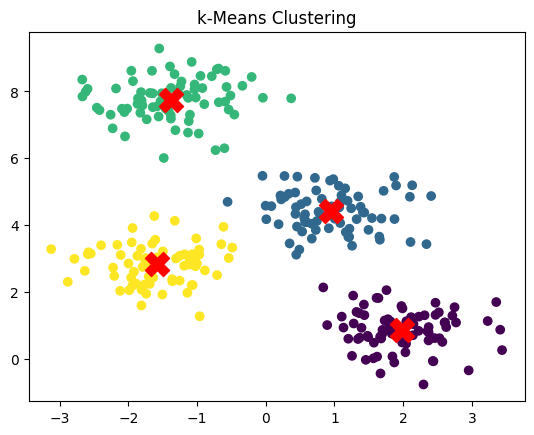

In [4]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("k-Means Clustering")
plt.show()

**Data Generation:**
   - `make_blobs` generates synthetic data for clustering, with:
     - `n_samples=300`: 300 data points.
     - `centers=4`: Four distinct clusters.
     - `cluster_std=0.60`: Spread of each cluster.
     - `random_state=0`: Ensures reproducibility.

**Model Training:**
   - `KMeans(n_clusters=4)`: The k-Means algorithm is initialized to find 4 clusters.
   - `fit(X)`: The model is trained on the generated data \( X \), assigning each point to the nearest cluster center.
   
**Visualization:**
   - Data points are colored by their assigned cluster labels (`kmeans.labels_`).
   - Cluster centers are plotted as red `X`s to indicate the centroid positions.

**Output:**
   - The scatter plot shows how the data points are grouped into clusters, with centroids marked for each cluster.

# Decision Tree

In [5]:
iris = load_iris()
X, y = iris.data, iris.target
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)
print("Decision Tree Structure:")
print(export_text(tree, feature_names=iris.feature_names))

Decision Tree Structure:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



**Dataset:**
   - `load_iris()`: Loads the Iris dataset with:
     - `X`: Features (sepal/petal length and width).
     - `y`: Target labels (flower species).

**Model Training:**
   - `DecisionTreeClassifier(max_depth=3)`: Initializes a decision tree model with:
     - `max_depth=3`: Limits the tree depth to prevent overfitting.
     - `random_state=42`: Ensures reproducibility.
   - `fit(X, y)`: Trains the model on the Iris dataset.

**Tree Structure:**
   - `export_text(tree, feature_names=iris.feature_names)`: Outputs the tree's decision rules, showing how features are split at each node.

# Random Forest

In [6]:
X_train, y_train = [[0, 0], [1, 1]], [0, 1]
X_test, y_test = [[0, 0], [1, 1]], [0, 1]
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", np.mean(y_pred == y_test))

Random Forest Accuracy: 1.0


# SVM Classification

In [7]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# PCA

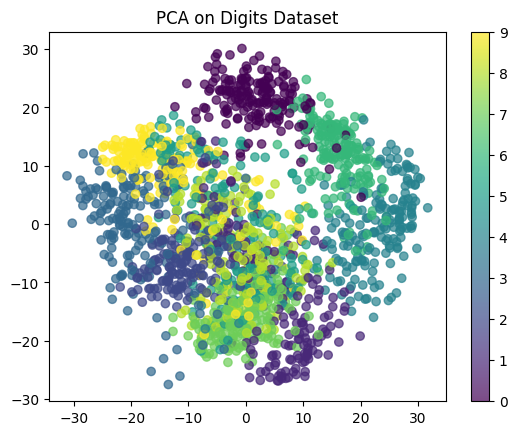

In [8]:
digits = load_digits()
X = digits.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("PCA on Digits Dataset")
plt.show()

In [9]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(kernel='linear', random_state=42))])